Noise Threshold:120.198226193
the lines which are above the threshold: 
74
the lines which are above the threshold: 
75
the lines which are above the threshold: 
83
the lines which are above the threshold: 
84
the lines which are above the threshold: 
85
the lines which are above the threshold: 
86
the lines which are above the threshold: 
87
the lines which are above the threshold: 
88
the lines which are above the threshold: 
89
the lines which are above the threshold: 
90
the lines which are above the threshold: 
91
the lines which are above the threshold: 
92
the lines which are above the threshold: 
93
the lines which are above the threshold: 
94
the lines which are above the threshold: 
95
the lines which are above the threshold: 
96
the lines which are above the threshold: 
97
the lines which are above the threshold: 
98
the lines which are above the threshold: 
99
the lines which are above the threshold: 
100
the lines which are above the threshold: 
101
the lines which are abo

the lines which are above the threshold: 
332
the lines which are above the threshold: 
333
the lines which are above the threshold: 
334
the lines which are above the threshold: 
335
the lines which are above the threshold: 
336
the lines which are above the threshold: 
337
the lines which are above the threshold: 
338
the lines which are above the threshold: 
339
the lines which are above the threshold: 
340
the lines which are above the threshold: 
341
the lines which are above the threshold: 
342
the lines which are above the threshold: 
343
the lines which are above the threshold: 
344
the lines which are above the threshold: 
345
the lines which are above the threshold: 
346
the lines which are above the threshold: 
347
the lines which are above the threshold: 
348
the lines which are above the threshold: 
349
the lines which are above the threshold: 
350
the lines which are above the threshold: 
351
the lines which are above the threshold: 
352
the lines which are above the thre

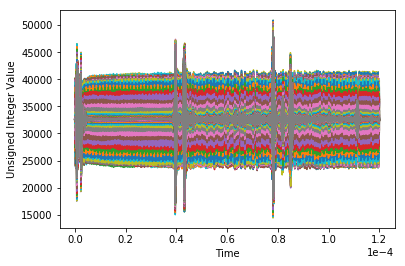

In [3]:
#we have first this command that initialize and matplotlib (library) for plotting and we specify that we want those plots inline in this notebook
%matplotlib inline

#now we import different packages that will allow to do math, lineal algebra, numerical operations, array operations and plotting
import scipy as Sci
import scipy.linalg
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt

#we use a simple open command for the file (basic Python)
f = open('data/UltrasoundSampleSignal.dat','rb')
#we read it using a numpy (therefore the np.) command that allows direct reading from file into an array
AllSignal = np.fromfile(f,count=-1,dtype=np.uint16)
#we will now populate an array for the time which we now is 1/125MHz step for a total of 15000
x=np.arange(0,15000/125e6,1/125e6)
FirstLine = AllSignal[:15000]
#we first eliminate dc
dataFirstLine = FirstLine - np.mean(FirstLine)
L=len(dataFirstLine)
#the frequencies after fft will be between 0 and 1/2 of the sampling frequency
f=np.arange(0,125e6/2,125e6/15000)
W=np.fft.fft(dataFirstLine)
PyyClean=abs(W)/L
#NoiseThreshold = np.amax(PyyClean)
NoiseThreshold = max(PyyClean)
print("Noise Threshold:"+ str(NoiseThreshold))
#We continue plotting other lines (we will plot every line and there are 460)
totalLines = np.arange(460)
i=0


for index in totalLines:
    
    Remove_DC_Component = AllSignal[index*15000:(index+1)*15000]-np.mean(AllSignal[index*15000:(index+1)*15000])
    Length_Of_All_Lines = len(Remove_DC_Component)
    FFT_Of_Above_Signal = np.fft.fft(Remove_DC_Component)
    Positive_Peaks_Of_Signal = abs(FFT_Of_Above_Signal)/Length_Of_All_Lines
    Amplitude = max(Positive_Peaks_Of_Signal)
     
    if Amplitude > NoiseThreshold:
        i=i+1
        plt.plot(x,AllSignal[index*15000:(index+1)*15000])
        plt.xlabel('Time')
        plt.ylabel('Unsigned Integer Value')
        plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
        print ("the lines which are above the threshold: " )
        print(str(index))
print ("Total no of lines above the threshold are " + str(i))